# Introduction
In this kernel, I will be trying to analyze the HCI data and try to construct a good classifier which can predict heart disease.
If youre new, you will learn the following from this kernel:
1. Simple Matplotlib data visualization
2. Making a baseline dummy classfier
3. Constructing and training classifiers of different types.
4. Converting categorical variables to dummy variables
5. Comparing classifiers (using ROC curves and other means).

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

['heart.csv']


# Exploration
The first part of the kernel will be simple exploration of the data and visual analysis
Lets see how we can go about it.

## Reading the data and seeing the features available

In [42]:
df = pd.read_csv("../input/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Explanation of the feature names
The features serially are:
1. age 
2. sex 
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

From the above description we can see that most of the features have continuous values, but a few (chest pain type, resting electrocardiogram, number of major vessels and thal) are discrete type. We need to evaluate these the continuous and the discrete ones differently.

## Discerete Data Exploration
First we will explore the discrete features, mainly visually and see if we can find any insights.

### Chest Pain Type

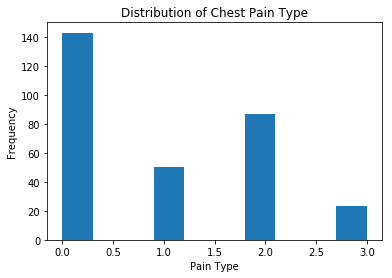

In [4]:
# CHEST PAIN TYPE

cp = df["cp"]
plt.hist(cp)
plt.title("Distribution of Chest Pain Type")
plt.xlabel("Pain Type")
plt.ylabel("Frequency")
plt.show()

So majority of the pain types are 0.
Now we should see the distribution of the target with this variable

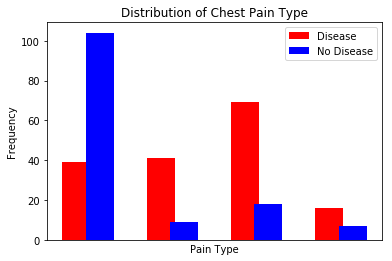

In [5]:
cp1 = df[df["target"] == 1]["cp"]
cp0 = df[df["target"] == 0]["cp"]

bar_width = 0.25

plt.hist(cp1 - bar_width, color = "red", rwidth=1, label="Disease")
plt.hist(cp0, color="blue", rwidth=1, label="No Disease")
plt.title("Distribution of Chest Pain Type")
plt.xlabel("Pain Type")
plt.ylabel("Frequency")
plt.xticks([])
plt.legend()
plt.show()

So it is evident that the chance of having the disease increases as the pain type number increases. Lets have a look at the probability distribution of the same

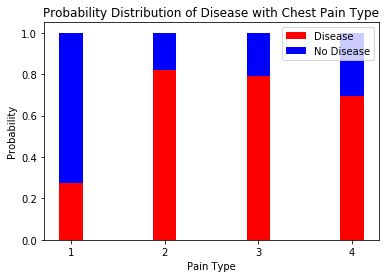

In [6]:
cp_probs = {}
for i in set(df["cp"]):
    total = df[df["cp"] == i]
    cp_probs[i] = sum(total["target"] == 1) / len(total), sum(total["target"] == 0) / len(total)
keys = np.array(list(cp_probs.keys()))
values= np.array([np.array(w) for w in cp_probs.values()])
width = 0.25
plt.bar(keys, values[:, 0], width, label="Disease", color="red")
plt.bar(keys, values[:, 1], width, bottom=values[:, 0], label="No Disease", color="blue")
plt.title("Probability Distribution of Disease with Chest Pain Type")
plt.xlabel("Pain Type")
plt.ylabel("Probability")
plt.xticks(keys, [1, 2, 3, 4])
plt.legend()
plt.show()

#### Inference:
The above graph is very informative. We get a very good sense of the probability of having disease goes up if the chest pain is of any type other than 0.
If we train a classifier based on only this property, it will give decent results. Lets try and do that.

### Train Test Split
Here we will train a simple Logistic Regression Classification model to predict disease using Chest Pain ("cp") feature
First we need to split the data into training and testing parts so that we infer model performance when given unseen data.

In [7]:

from sklearn.model_selection import train_test_split

#Getting all the feature columns
features = list(df.columns)
features.remove("target")

X_train, X_test, y_train, y_test = train_test_split(df["cp"], df["target"])

## Baseline models
In this section, we will train a baseline model to compare our more feature rich models. The baseline models would just predict the most frquent class for all observations. Lets have a go.

Accuracy: 0.6447368421052632
Recall: 1.0
Precision: 0.6447368421052632


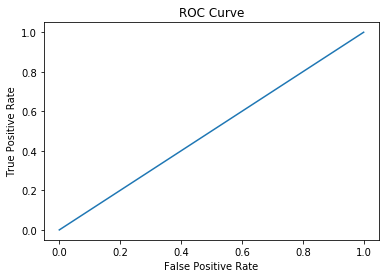

AUC Score: 0.5


In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve

d_clf = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
predicted = d_clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test, predicted)))
print("Recall: {}".format(recall_score(y_test, predicted)))
print("Precision: {}".format(precision_score(y_test, predicted)))
# print("AUC: {}".format(auc(y_test, predicted)))
d_fpr, d_tpr, d_thresholds = roc_curve(y_test, predicted)
plt.plot(d_fpr, d_tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("AUC Score: {}".format(roc_auc_score(y_test, predicted)))

### Now we will train a logistic regression classifier using only the cp feature and then compare it to the baseline model

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.8026315789473685
Recall: 0.7959183673469388
Precision: 0.8863636363636364


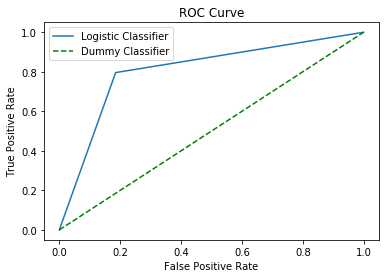

AUC Score: 0.8053665910808768


In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(np.array(X_train).reshape(-1, 1), y_train)
predicted = clf.predict(np.array(X_test).reshape(-1, 1))
print("Accuracy: {}".format(accuracy_score(y_test, predicted)))
print("Recall: {}".format(recall_score(y_test, predicted)))
print("Precision: {}".format(precision_score(y_test, predicted)))
# print("AUC: {}".format(auc(y_test, predicted)))
fpr, tpr, d_thresholds = roc_curve(y_test, predicted)
plt.plot(fpr, tpr, label="Logistic Classifier")
plt.plot(d_fpr, d_tpr, color="green", linestyle="--", label="Dummy Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("AUC Score: {}".format(roc_auc_score(y_test, predicted)))

### Improvement
The above simple models performs pretty well with accuracy, precision and recall scores approaching 80%.
Lets try and explore other features now.

## Exploring Age
It is commonly known that the risk of heart disease increases with age. So, we will explore the age feature a little now

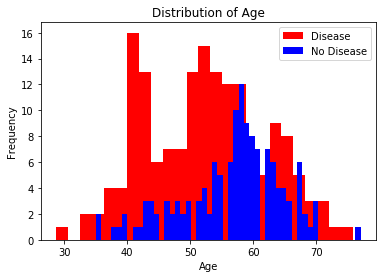

In [10]:
ag1 = df[df["target"] == 1]["age"]
ag0 = df[df["target"] == 0]["age"]

bar_width = 0.25

plt.hist(ag1 - bar_width, color = "red", bins=25, rwidth=1, label="Disease")
plt.hist(ag0, color="blue", rwidth=1, bins=50, label="No Disease")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

[]

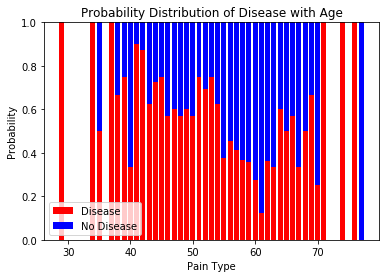

In [11]:
ag_probs = {}
for i in set(df["age"]):
    total = df[df["age"] == i]
    ag_probs[i] = sum(total["target"] == 1) / len(total), sum(total["target"] == 0) / len(total)
keys = np.array(list(ag_probs.keys()))
values= np.array([np.array(w) for w in ag_probs.values()])
# width = 0.25
plt.bar(keys, values[:, 0], label="Disease", color="red")
plt.bar(keys, values[:, 1], bottom=values[:, 0], label="No Disease", color="blue")
plt.title("Probability Distribution of Disease with Age")
plt.xlabel("Pain Type")
plt.ylabel("Probability")
plt.legend()
plt.plot()

We can see that age is not a good indicator of heart disease. Although the probability of heart disease increasing with age, visually the difference does not look significant.
Comparitively, the last variable "cp" did a better job. 
Lets see how a model trained only on age performs:

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.618421052631579
Recall: 0.7857142857142857
Precision: 0.6226415094339622


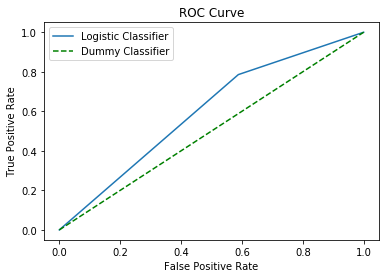

AUC Score: 0.5987394957983193


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df["age"], df["target"])

clf = LogisticRegression().fit(np.array(X_train).reshape(-1, 1), y_train)
predicted = clf.predict(np.array(X_test).reshape(-1, 1))
print("Accuracy: {}".format(accuracy_score(y_test, predicted)))
print("Recall: {}".format(recall_score(y_test, predicted)))
print("Precision: {}".format(precision_score(y_test, predicted)))
# print("AUC: {}".format(auc(y_test, predicted)))
fpr, tpr, d_thresholds = roc_curve(y_test, predicted)
plt.plot(fpr, tpr, label="Logistic Classifier")
plt.plot(d_fpr, d_tpr, color="green", linestyle="--", label="Dummy Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("AUC Score: {}".format(roc_auc_score(y_test, predicted)))

We can see that the model slightly outperforms the baseline model. The scores also point out the same.

## Cholesterol
Lets have a look at cholesterol feature, which has been reported to be one of the best indicators of heart disease

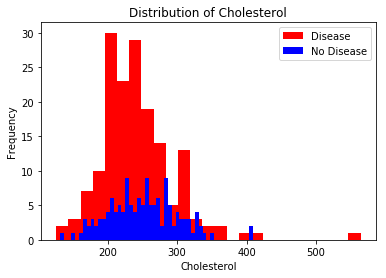

In [13]:
ch1 = df[df["target"] == 1]["chol"]
ch0 = df[df["target"] == 0]["chol"]

bar_width = 0.25

plt.hist(ch1, color = "red", bins=25, rwidth=1, label="Disease")
plt.hist(ch0, color="blue", rwidth=1, bins=50, label="No Disease")
plt.title("Distribution of Cholesterol")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Visually it doesnt seem like cholesterol is a very good indicator of heart disease. Lets see how it performs as a feature.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.4868421052631579
Recall: 1.0
Precision: 0.4868421052631579


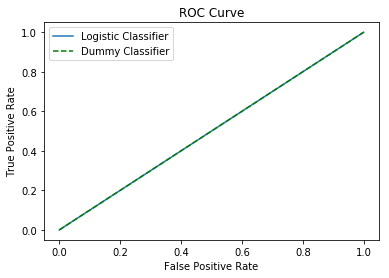

AUC Score: 0.5


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df["chol"], df["target"])

clf = LogisticRegression().fit(np.array(X_train).reshape(-1, 1), y_train)
predicted = clf.predict(np.array(X_test).reshape(-1, 1))
print("Accuracy: {}".format(accuracy_score(y_test, predicted)))
print("Recall: {}".format(recall_score(y_test, predicted)))
print("Precision: {}".format(precision_score(y_test, predicted)))
# print("AUC: {}".format(auc(y_test, predicted)))
fpr, tpr, d_thresholds = roc_curve(y_test, predicted)
plt.plot(fpr, tpr, label="Logistic Classifier")
plt.plot(d_fpr, d_tpr, color="green", linestyle="--", label="Dummy Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("AUC Score: {}".format(roc_auc_score(y_test, predicted)))

As expected, cholesterol only can not significantly predict heart disease

### Blood Pressure

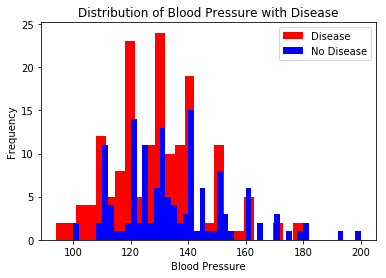

In [15]:
bp1 = df[df["target"] == 1]["trestbps"]
bp0 = df[df["target"] == 0]["trestbps"]

bar_width = 0.25

plt.hist(bp1, color = "red", bins=25, rwidth=1, label="Disease")
plt.hist(bp0, color="blue", rwidth=1, bins=50, label="No Disease")
plt.title("Distribution of Blood Pressure with Disease")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.5789473684210527
Recall: 0.975
Precision: 0.5571428571428572


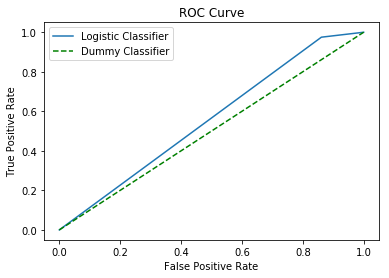

AUC Score: 0.5569444444444445


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df["trestbps"], df["target"])

clf = LogisticRegression().fit(np.array(X_train).reshape(-1, 1), y_train)
predicted = clf.predict(np.array(X_test).reshape(-1, 1))
print("Accuracy: {}".format(accuracy_score(y_test, predicted)))
print("Recall: {}".format(recall_score(y_test, predicted)))
print("Precision: {}".format(precision_score(y_test, predicted)))
# print("AUC: {}".format(auc(y_test, predicted)))
fpr, tpr, d_thresholds = roc_curve(y_test, predicted)
plt.plot(fpr, tpr, label="Logistic Classifier")
plt.plot(d_fpr, d_tpr, color="green", linestyle="--", label="Dummy Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("AUC Score: {}".format(roc_auc_score(y_test, predicted)))

Again we see that the resting blood pressure is not a very good indicator of heart disease

## Stress Tests:
Features 7 - 11 ('restecg', 'thalach', 'exang', 'oldpeak', 'slope') are results of heart under stress test
The full forms are: 
1. restecg - resting electrocardiographic results (values 0,1,2)
2. thalach - maximum heart rate achieved 
3. exang - exercise induced angina 
4. oldpeak - ST depression induced by exercise relative to rest 
5. slope - the slope of the peak exercise ST segment 

These features are believed to be very good indicators:
Lets see more:

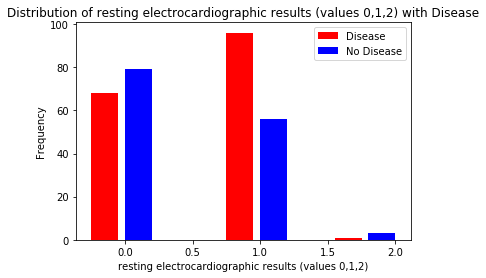

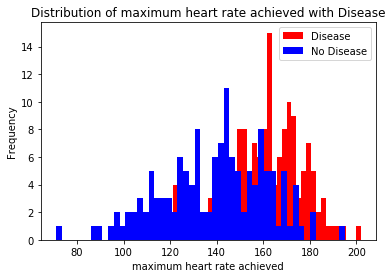

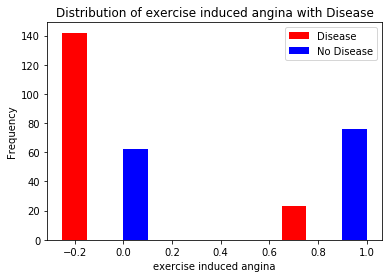

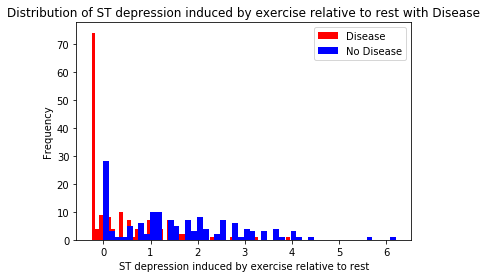

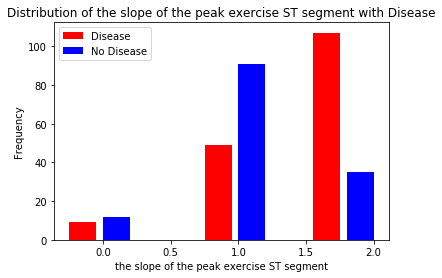

In [17]:
name_dict = {"restecg":"resting electrocardiographic results (values 0,1,2)", "thalach":"maximum heart rate achieved","exang":"exercise induced angina", "oldpeak" :"ST depression induced by exercise relative to rest", "slope":"the slope of the peak exercise ST segment"}

for feat in ['restecg', 'thalach', 'exang', 'oldpeak', 'slope']:
    feat1 = df[df["target"] == 1][feat]
    feat0 = df[df["target"] == 0][feat]

    bar_width = 0.25
    if feat in ['restecg', 'exang', 'slope']:
        plt.hist(feat1 - bar_width, color = "red", rwidth=1, label="Disease")
        plt.hist(feat0, color="blue", rwidth=1, label="No Disease")
    else:
        plt.hist(feat1 - bar_width, color = "red", bins=50, rwidth=1, label="Disease")
        plt.hist(feat0, color="blue", rwidth=1, bins=50, label="No Disease")        
    plt.title("Distribution of {} with Disease".format(name_dict[feat]))
    plt.xlabel(name_dict[feat])
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

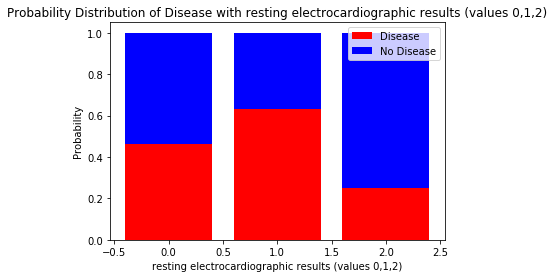

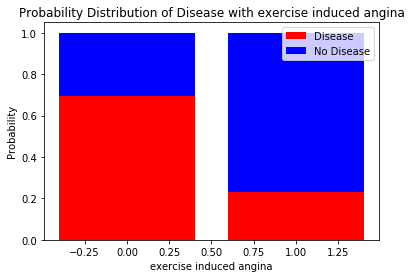

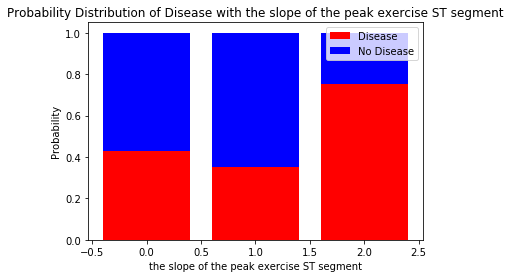

In [18]:
for feat in ['restecg', 'exang', 'slope']:
    feat_probs = {}
    for i in set(df[feat]):
        total = df[df[feat] == i]
        feat_probs[i] = sum(total["target"] == 1) / len(total), sum(total["target"] == 0) / len(total)
    keys = np.array(list(feat_probs.keys()))
    values= np.array([np.array(w) for w in feat_probs.values()])
    # width = 0.25
    plt.bar(keys, values[:, 0], label="Disease", color="red")
    plt.bar(keys, values[:, 1], bottom=values[:, 0], label="No Disease", color="blue")
    plt.title("Probability Distribution of Disease with {}".format(name_dict[feat]))
    plt.xlabel(name_dict[feat])
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

## Classifier
Now we will get into the most interesting part, making a good classifier. We will explore different types of algorithms for the purpose. Lets begin, but first, we will need to do some preprocessing, i.e. make dummy variables.

### Dummy Variables
Now we will start working with dummy variables, which are used to make processing categorical variables easy. So if there is 4 categories of a variable, and we use dummy variables, 4 new variables will be created, with every variable having value one for the observation where it was observed, zero otherwise. So it is like one hot encoding categorical variables.

In [19]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [20]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [43]:
df = df.astype({"age": "int64", "sex": "int64", "cp": "object", "trestbps": "int64", "chol": "int64", "fbs": "int64", "restecg": "object", "thalach": "int64", "exang": "int64", "oldpeak": "float64", "slope": "object", "ca": "int", "thal": "object", "target": "int64"})     
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
df.dtypes

age           int64
sex           int64
cp           object
trestbps      int64
chol          int64
fbs           int64
restecg      object
thalach       int64
exang         int64
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [45]:
df = pd.get_dummies(df)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [46]:
df.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
ca             int64
target         int64
cp_0           uint8
cp_1           uint8
cp_2           uint8
cp_3           uint8
restecg_0      uint8
restecg_1      uint8
restecg_2      uint8
slope_0        uint8
slope_1        uint8
slope_2        uint8
thal_0         uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object

In [47]:
X = df.loc[:, ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'thal_0',
       'thal_1', 'thal_2', 'thal_3']]
y = df["target"]

In [48]:
X.head(2)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.8552631578947368
Recall: 0.8863636363636364
Precision: 0.8666666666666667


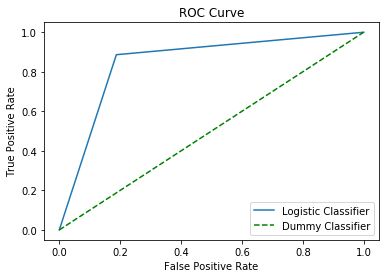

AUC Score: 0.8494318181818181


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = LogisticRegression().fit(np.array(X_train), y_train)

predicted = clf.predict(np.array(X_test))

print("Accuracy: {}".format(accuracy_score(y_test, predicted)))
print("Recall: {}".format(recall_score(y_test, predicted)))
print("Precision: {}".format(precision_score(y_test, predicted)))
# print("AUC: {}".format(auc(y_test, predicted)))

fpr, tpr, d_thresholds = roc_curve(y_test, predicted)
plt.plot(fpr, tpr, label="Logistic Classifier")
plt.plot(d_fpr, d_tpr, color="green", linestyle="--", label="Dummy Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("AUC Score: {}".format(roc_auc_score(y_test, predicted)))

Okay the logistic regression did a good job, getting the accuracy, precision and recall all above 80%, which is good. Now we will explore other types of models now

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classifier: SVM Classifier
Accuracy: 0.5921052631578947
Recall: 0.9772727272727273
Precision: 0.589041095890411
AUC Score: 0.5198863636363636


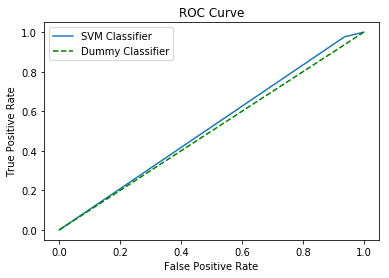

Classifier: Tree
Accuracy: 0.7236842105263158
Recall: 0.75
Precision: 0.7674418604651163
AUC Score: 0.71875


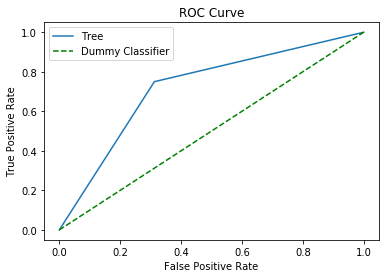

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classifier: Random Forest
Accuracy: 0.8947368421052632
Recall: 0.9318181818181818
Precision: 0.8913043478260869
AUC Score: 0.8877840909090908


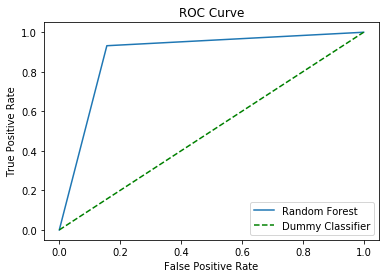

In [57]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


clf_names = {SVC: "SVM Classifier", DecisionTreeClassifier: "Tree", RandomForestClassifier: "Random Forest"}
for classifier in [SVC, DecisionTreeClassifier, RandomForestClassifier]:
    clf = classifier().fit(np.array(X_train), y_train)

    predicted = clf.predict(np.array(X_test))
    print("Classifier: {}".format(clf_names[classifier]))
    print("Accuracy: {}".format(accuracy_score(y_test, predicted)))
    print("Recall: {}".format(recall_score(y_test, predicted)))
    print("Precision: {}".format(precision_score(y_test, predicted)))
    # print("AUC: {}".format(auc(y_test, predicted)))
    print("AUC Score: {}".format(roc_auc_score(y_test, predicted)))
    fpr, tpr, d_thresholds = roc_curve(y_test, predicted)
    plt.plot(fpr, tpr, label=clf_names[classifier])
    plt.plot(d_fpr, d_tpr, color="green", linestyle="--", label="Dummy Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


### Result:
The best classifier seems to be the simple logistic regression and the slightly more complex random forest classifier. With that I will end this notebook. Please feel free to comment in case of any queries. Thank You...